In [1]:
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/nilberthsouza/Titanic-Kaggle/master/train.csv')
fig = plt.figure(figsize=(18,6))

<Figure size 1296x432 with 0 Axes>

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4018: RuntimeWarning: divide by zero encountered in log
  trm = _norm_pdf(a + b * np.log(x + np.sqrt(x2+1)))


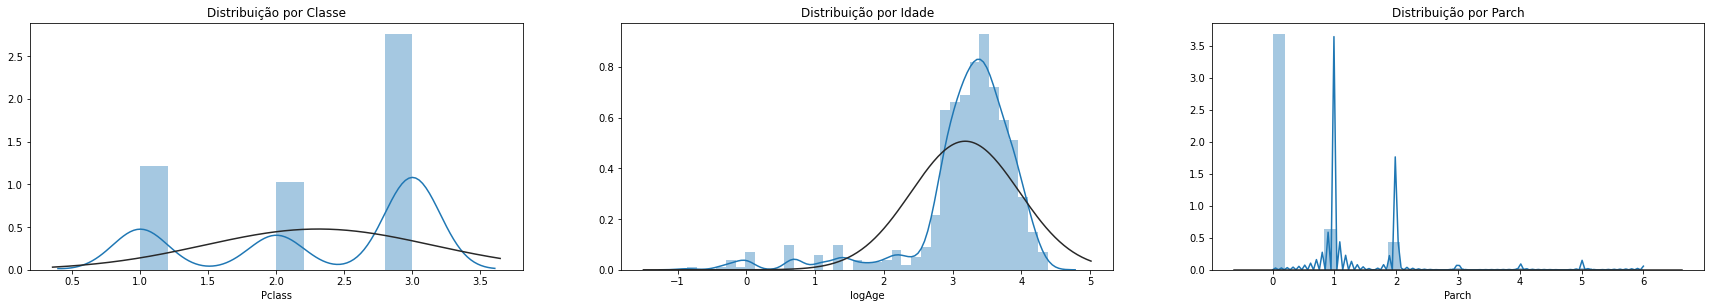

In [18]:
from scipy import stats


plt.figure(figsize=(30,10))

plt.subplot2grid((2,3),(0,0))
plt.title("Distribuição por Classe")
sns.distplot(df.Pclass, fit=stats.norm)

plt.subplot2grid((2,3),(0,1))
plt.title("Distribuição por Idade")
sns.distplot(df.Age,fit=stats.lognorm)

plt.subplot2grid((2,3),(0,2))
plt.title("Distribuição por Parch")
sns.distplot(df.Parch, fit=stats.johnsonsu)

Vamos usar o teste Qui quadrado para verificar se existe associação entre 2 variaveis qualitativas. 

In [0]:
df.Survived[df.Sex=='male'].value_counts()

0    468
1    109
Name: Survived, dtype: int64

In [0]:
df.Survived[df.Sex == 'female'].value_counts()

1    233
0     81
Name: Survived, dtype: int64

In [0]:
print("Porcentagem de Homens que sobreviveram:",109/(109+233))
print("Porcentagem de Mulheres que sobreviveram:",233/(109+233))



Porcentagem de Homens que sobreviveram: 0.31871345029239767
Porcentagem de Mulheres que sobreviveram: 0.6812865497076024


In [0]:
#..........     homens        mulheres
#sobreviveram   109             233
#morreram       468             81

observation = np.array([[109,233],[468,81]])


stats.chi2_contingency(observation, correction=False)[1] 

3.711747770113424e-59

In [0]:
Como ```3.711747770113424e-59``` é menor que 0.05 sabemos que sim o genero tem impacto no 

In [0]:
df.Sex.value_counts(normalize=True).plot(kind='bar',color=['blue','pink'])
plt.title('Survived by Sex')

In [0]:
df.Survived[df.Sex=='male'].value_counts(normalize=True).plot(kind='bar')
plt.title('Men Survived')

In [0]:
df.Survived[df.Sex=='female'].value_counts(normalize=True).plot(kind='bar',color='pink')
plt.title('Women Survived')
plt.show()

In [0]:
df.Sex[df.Survived==1].value_counts(normalize=True).plot(kind='bar')

In [0]:
#preciso tratar os nulos 
plt.hist(df.Age)

In [0]:
plt.hist(df.Age[df.Sex=='female'])


In [0]:
plt.hist(df.Age[df.Sex=='male'])


In [0]:
plt.hist(df.Survived[df.Pclass=1])
